In [2]:
import numpy as np
import pandas as pd 


from skimage import io

import matplotlib.pyplot as plt

import gabor_filters
from  gabor_filters import gabor_filter
from  gabor_filters import gabor_filter_response

# from gabor_filters.gabor_filter import GaborFilter as gb
# from gabor_filters.gabor_filter import GaborFilterBank as gbb

# from gabor_filters.gabor_filter_response import GaborFilterResponse as gbfr
# from gabor_filters.gabor_filter_response import GaborFilteredResponseBank as gbfrb

import importlib
importlib.reload(gabor_filters)
importlib.reload(gabor_filters.gabor_filter)
importlib.reload(gabor_filters.gabor_filter_response)

from gabor_filters.gabor_filter import GaborFilterBank as gbb
from gabor_filters.gabor_filter_response import GaborFilteredResponseBank as gbfrb

In [3]:
dfFoldTraining_1 = pd.read_csv('..//_inputs//_images_Zooscan//_Zooscan-training-fold_4.csv')
dfFoldTraining_1.index[dfFoldTraining_1['short_filenames'] == "0064-cop_calanoida_ptt.png"].tolist()

[11838]

([], [])

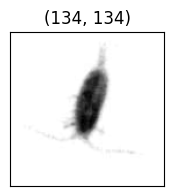

In [4]:
# read an image for testing
img = io.imread(dfFoldTraining_1["filenames"][11838])

plt.figure(figsize=(5,2))

plt.imshow(img,cmap='Greys_r')

plt.title(str(img.shape))
plt.xticks([])
plt.yticks([])

In [5]:
row = img.shape[0]
col = img.shape[1] # size of image
fmax = 0.327 # maximum frequency

k = np.sqrt(2) #frequency ratio or factor for selecting filter frequencies

p = 0.5 # crossing point between two consecutive filters, default 0.5
# pf = np.sqrt(0.99) #energy to include in the filters

u = 6 #number of frequencies
v = 8 #number of orientation

In [6]:

GaborFilterBank = gbb().create_a_set_of_gabor_filters(fmax, k, p, u, v, row, col)

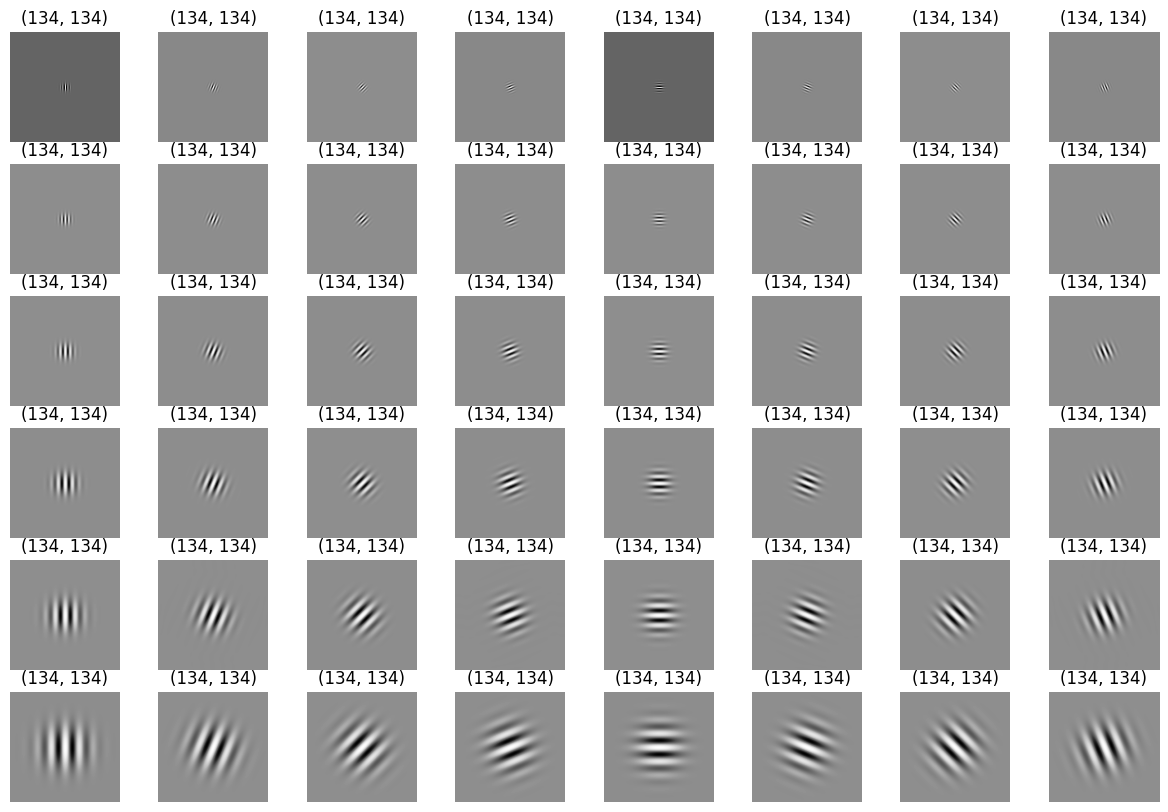

In [8]:
gbb().display_gabor_filter_bank_on_spatial_domain(GaborFilterBank, u, v, (15,10))

In [9]:
GaborFilteredReponses = gbfrb().create_a_set_of_Gabor_filtered_responses(img, GaborFilterBank)

In [10]:
meh = gbfrb().convert_a_set_Gabor_filtered_responses_to_ndarray(GaborFilteredReponses)

/home/centuri-mep-01/workspaces/jupyterlab/_Plankton_Zooscan-Machine_Learning/_pyscripts/gabor_filters/gabor_filter_response.py:232: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


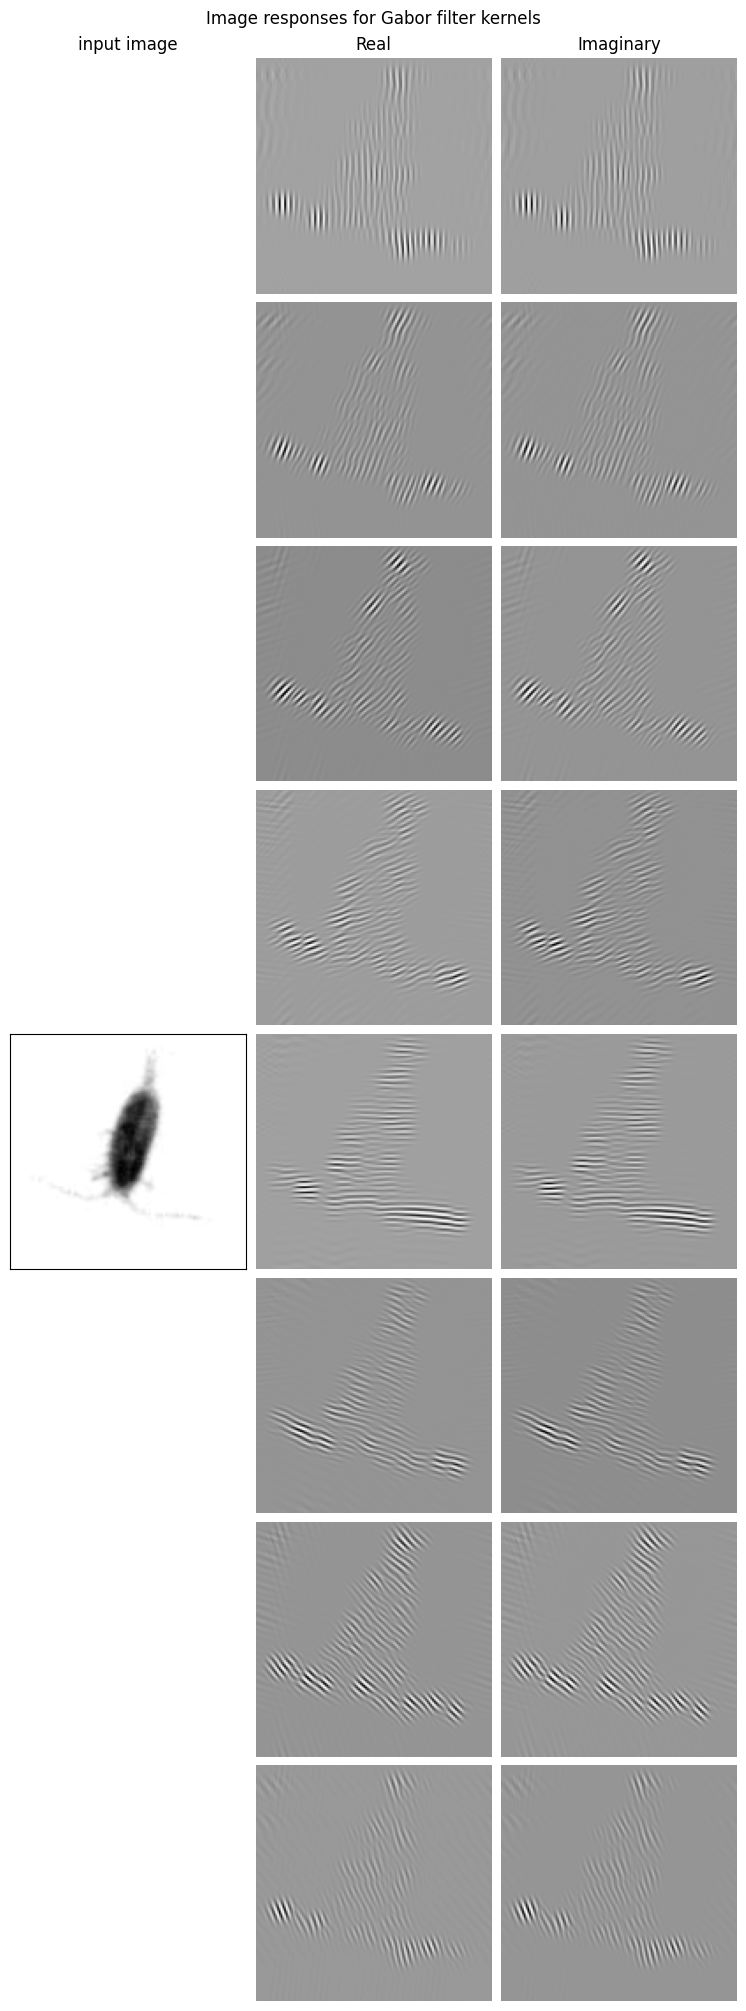

In [11]:
gbfrb().display_image_with_its_responses(img, meh, 8, (15,20))

([], [])

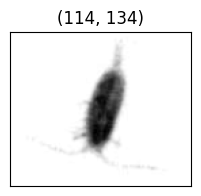

In [13]:
# read an image for testing
img = io.imread("0064-cop_calanoida_ptt_resized.png")[:,:,0]

plt.figure(figsize=(5,2))

plt.imshow(img,cmap='Greys_r')

plt.title(str(img.shape))
plt.xticks([])
plt.yticks([])

In [14]:
GaborFilteredReponses = gbfrb().create_a_set_of_Gabor_filtered_responses(img, GaborFilterBank)
meh = gbfrb().convert_a_set_Gabor_filtered_responses_to_ndarray(GaborFilteredReponses)

/home/centuri-mep-01/workspaces/jupyterlab/_Plankton_Zooscan-Machine_Learning/_pyscripts/gabor_filters/gabor_filter_response.py:232: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


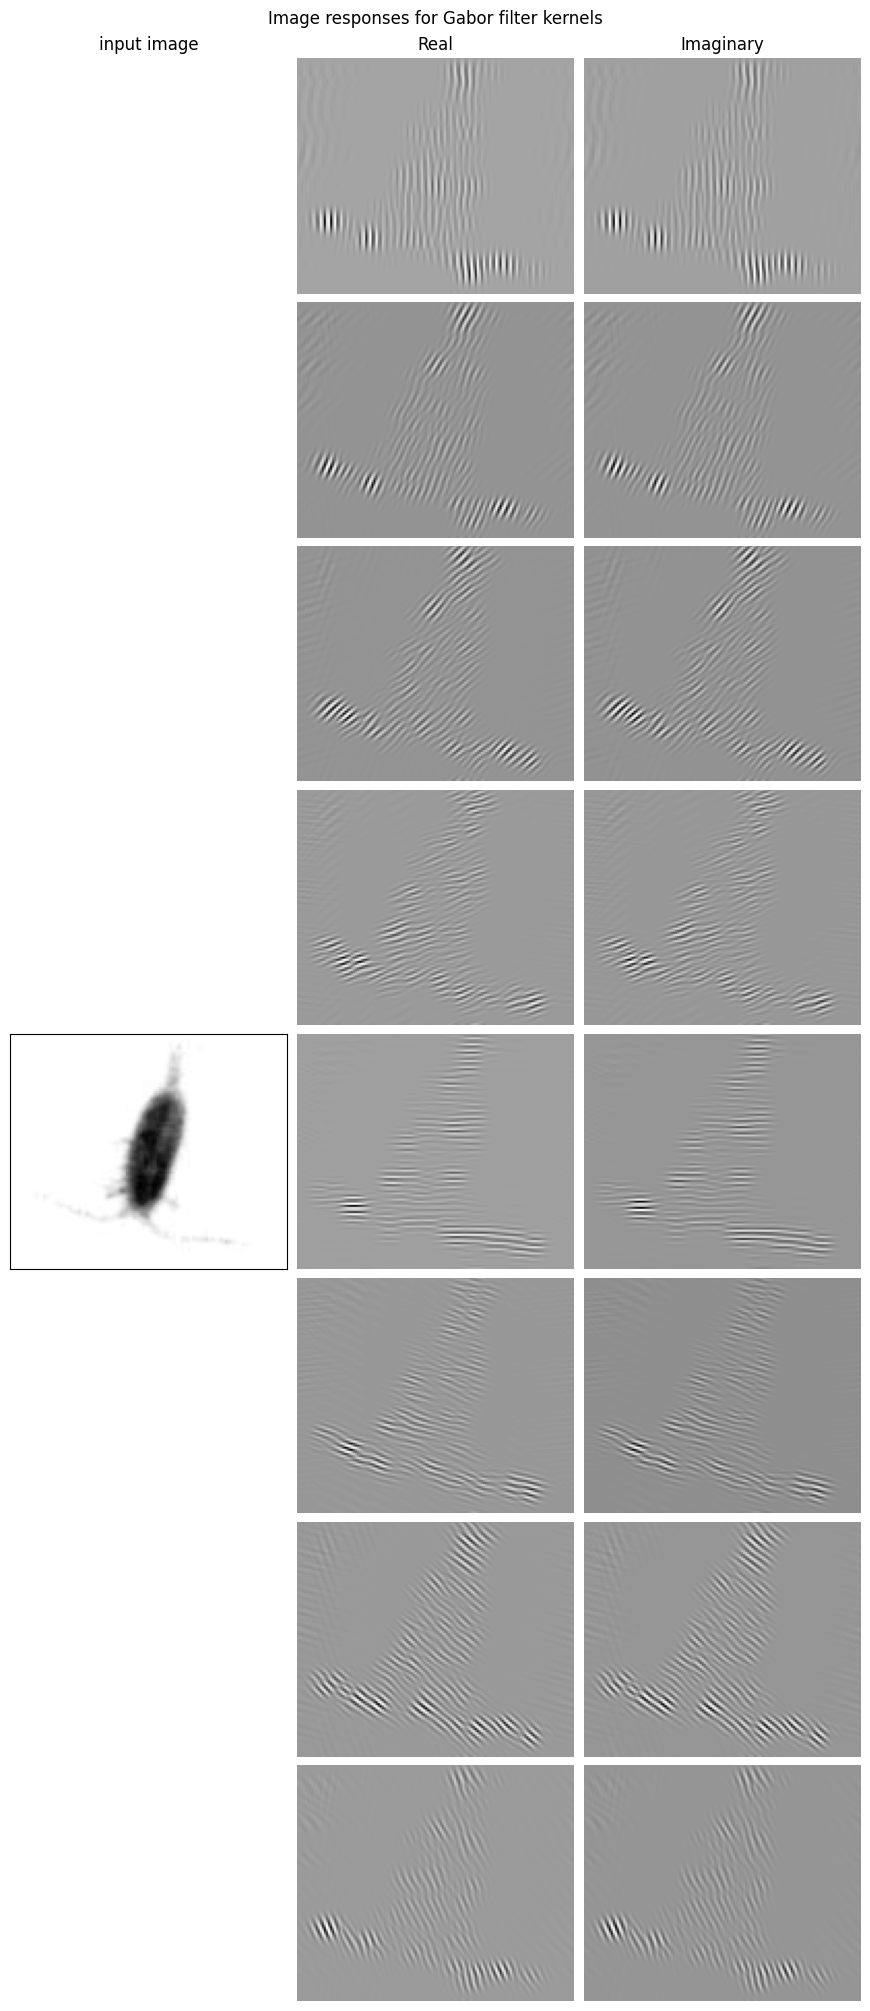

In [15]:
gbfrb().display_image_with_its_responses(img, meh, 8, (15,20))